In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

In [33]:
def load_raw_data(file):
    filePath = Path('C:\\Temp\\MRes\\training_data', file)
    data = pd.read_csv(filePath)
    return data

def feature_target(data):
    data = data.drop(columns=['geometry'])
    X, y = data.iloc[:,1:], data['GENUS']
    return(X, y)

def train_SVM(X_train, y_train):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def print_metrics(y_test, y_pred, X_test, model, filename):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('F1:', metrics.f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.precision_score(y_test, y_pred, average='weighted'))
    
    plot_confusion_matrix(model, X_test, y_test)
    filePath = Path()
    plt.savefig('filePath')
    plt.show()

Accuracy: 0.4659090909090909
F1: 0.3231244167625165
Precision: 0.25224905303030304
Recall: 0.25224905303030304


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


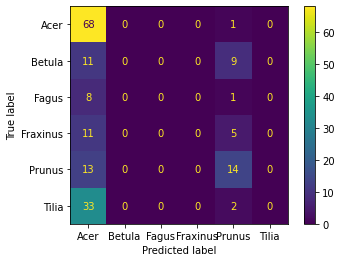

In [34]:
data = load_raw_data('AB_6cat_slim.csv')

X, y = feature_target(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

train_SVM(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)